In [49]:
import pandas as pd


In [50]:
df = pd.read_csv("/content/Salary.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [51]:
X = df["YearsExperience"]
Y = df["Salary"]
X = np.array(X)
temp = np.random.rand(30,1)
for i in range(0,X.shape[0]):
  temp[i][0] = X[i]
X = temp

Y = np.array(Y)
temp = np.random.rand(30,1)
for i in range(0,Y.shape[0]):
  temp[i][0] = Y[i]
Y = temp
X,Y
X.shape,Y.shape

((30, 1), (30, 1))

Iteration 0, MSE: 2688554027.2994256
Iteration 100, MSE: 111543325.9826072
Iteration 200, MSE: 83829634.88701768
Iteration 300, MSE: 65683976.14650651
Iteration 400, MSE: 53803027.845848985
Iteration 500, MSE: 46023925.71781462
Iteration 600, MSE: 40930525.05761315
Iteration 700, MSE: 37595599.01366157
Iteration 800, MSE: 35412041.80687655
Iteration 900, MSE: 33982348.31068939
final MSE: 33053784.57641532


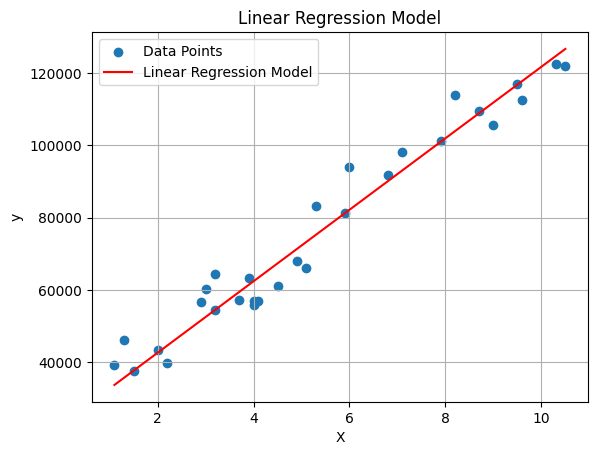

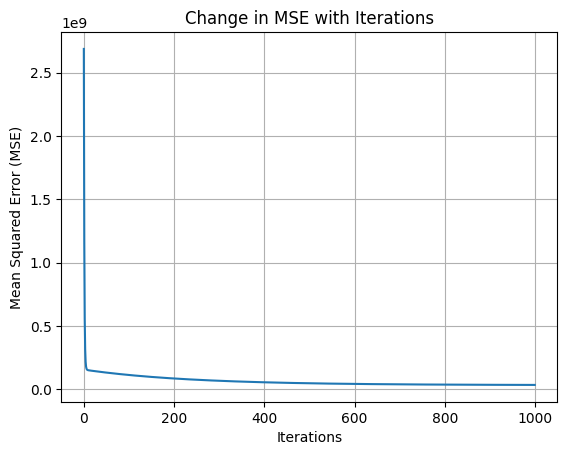

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_parameters(input_size):
    np.random.seed(0)
    W = np.random.randn(input_size, 1)
    b = 0
    return W, b

def calculate_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def optimize_weights(X, y, W, b, learning_rate):
    m = X.shape[0]
    y_pred = np.dot(X, W) + b
    dW = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)
    W -= learning_rate * dW
    b -= learning_rate * db

    return W, b

def update_weights(X, y, W, b, learning_rate, num_iterations):
    MSE_history = []
    for i in range(num_iterations):
        W, b = optimize_weights(X, y, W, b, learning_rate)
        y_pred = np.dot(X, W) + b
        mse = calculate_mse(y, y_pred)
        if i % 100 == 0:
            print(f"Iteration {i}, MSE: {mse}")
        if i == num_iterations - 1:
          print(f"final MSE: {mse}")
        MSE_history.append(mse)
    return W, b , MSE_history

# Initialize parameters
W, b = initialize_parameters(X.shape[1])

# Update weights
W, b, MSE_history = update_weights(X, Y, W, b, learning_rate=0.01, num_iterations=1000)

# Plot the data points
plt.scatter(X, Y, label='Data Points')

# Plot the linear regression line
x = np.linspace(X.min(), X.max(), 100)
y = (W * x + b).flatten()  # Flatten y_line to match dimensions
plt.plot(x, y, color='red', label='Linear Regression Model')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

MSE_history = np.array(MSE_history)
# Plot MSE history
plt.plot(range(len(MSE_history)), MSE_history)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Change in MSE with Iterations')
plt.grid(True)
plt.show()
